In [1]:
%pip install numerapi
%pip install pyarrow
%pip install pytorch
%pip install scipy --upgrade
%pip install numpy --upgrade
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached pytorch-1.0.2.tar.gz (689 bytes)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for pytorch
Failed to build pytorch
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [6 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "C:\Users\PeterTenholder\AppData\Local\Temp\pip-install-ufnmwwe5\pytorch_ad1c39ba88474a5db7e94ed30e5e9bd0\setup.py", line 15, in <module>
          raise Exception(message)
      Exception: You tried to install "pytorch". The package named for PyTorch is "torch"
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for pytorch

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Failed to build installable wheels for some pyproject.toml based projects (pytorch)


   ---------------------------------------- 0.0/41.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/41.2 MB ? eta -:--:--
   ---------------------------------------- 0.3/41.2 MB ? eta -:--:--
    --------------------------------------- 0.5/41.2 MB 1.1 MB/s eta 0:00:37
    --------------------------------------- 0.8/41.2 MB 1.2 MB/s eta 0:00:34
   - -------------------------------------- 1.0/41.2 MB 1.3 MB/s eta 0:00:32
   - -------------------------------------- 1.3/41.2 MB 1.3 MB/s eta 0:00:31
   - -------------------------------------- 1.8/41.2 MB 1.3 MB/s eta 0:00:30
   -- ------------------------------------- 2.1/41.2 MB 1.4 MB/s eta 0:00:29
   -- ------------------------------------- 2.6/41.2 MB 1.5 MB/s eta 0:00:27
   --- ------------------------------------ 3.1/41.2 MB 1.6 MB/s eta 0:00:25
   --- ------------------------------------ 3.4/41.2 MB 1.6 MB/s eta 0:00:24
   --- ------------------------------------ 3.9/41.2 MB 1.7 MB/s eta 0:00:23
   ---- ------------


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import numerapi
import numpy as np
import json
import pandas as pd
import os
import pyarrow.parquet as pq
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
from scipy.stats import spearmanr
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA



In [3]:
api = numerapi.NumerAPI()
api.download_dataset(
	"v5.0/train.parquet",
	"train.parquet"
)
api.download_dataset(
	"v5.0/validation.parquet",
	"validation.parquet"
)
api.download_dataset(
	"v5.0/validation_example_preds.parquet",
	"validation_example_preds.parquet"
)
api.download_dataset(
	"v5.0/live.parquet",
	"live.parquet"
)
api.download_dataset(
	"v5.0/live_example_preds.parquet",
	"live_example_preds.parquet"
)
api.download_dataset(
	"v5.0/features.json",
	"features.json"
)
api.download_dataset(
	"v5.0/train_benchmark_models.parquet",
	"train_benchmark_models.parquet"
)
api.download_dataset(
	"v5.0/validation_benchmark_models.parquet",
	"validation_benchmark_models.parquet"
)
api.download_dataset(
	"v5.0/live_benchmark_models.parquet",
	"live_benchmark_models.parquet"
)
api.download_dataset(
	"v5.0/meta_model.parquet",
	"meta_model.parquet"
)

2025-05-10 12:19:09,726 INFO numerapi.utils: target file already exists
2025-05-10 12:19:09,727 INFO numerapi.utils: download complete
2025-05-10 12:19:10,473 INFO numerapi.utils: target file already exists
2025-05-10 12:19:10,474 INFO numerapi.utils: starting download
validation.parquet: 6.77GB [03:01, 37.2MB/s]                            
2025-05-10 12:22:13,005 INFO numerapi.utils: target file already exists
2025-05-10 12:22:13,006 INFO numerapi.utils: starting download
validation_example_preds.parquet: 174MB [00:04, 35.1MB/s]                            
2025-05-10 12:22:18,702 INFO numerapi.utils: target file already exists
2025-05-10 12:22:18,703 INFO numerapi.utils: starting download
live.parquet: 15.8MB [00:00, 19.5MB/s]                   
2025-05-10 12:22:20,204 INFO numerapi.utils: target file already exists
2025-05-10 12:22:20,206 INFO numerapi.utils: starting download
live_example_preds.parquet: 342kB [00:00, 1.22MB/s]                   
2025-05-10 12:22:21,307 INFO numerapi

'meta_model.parquet'

In [4]:
print("File sizes:")
print(f"train.parquet: {os.path.getsize('train.parquet') / (1024*1024):.2f} MB")
print(f"validation.parquet: {os.path.getsize('validation.parquet') / (1024*1024):.2f} MB")
print(f"live.parquet: {os.path.getsize('live.parquet') / (1024*1024):.2f} MB")

File sizes:
train.parquet: 2256.78 MB
validation.parquet: 3234.22 MB
live.parquet: 7.51 MB


In [5]:
with open("features.json", "r") as f:
    features_info = json.load(f)

In [6]:
live_data = pd.read_parquet("live.parquet", engine="pyarrow", use_threads= False)
train_file = pq.ParquetFile("train.parquet")
first_batch = next(train_file.iter_batches(batch_size = 10000))
train_sample = first_batch.to_pandas()
val_file = pq.ParquetFile("validation.parquet")
val_sample = next(val_file.iter_batches(batch_size=10000))
val_sample = val_sample.to_pandas()

In [7]:
eras_df = pd.read_parquet("train.parquet", columns=["era"])
unique_eras = eras_df["era"].unique()
print(f"Training data has {len(unique_eras)} unique eras")

for era in unique_eras[:5]:
    era_data = pd.read_parquet("train.parquet", filters=[('era', '=', era)])


Training data has 574 unique eras


In [ ]:
def enhance_data_preparation(train_data, val_data, live_data, feature_cols):
    # 1. Winsorize extreme values (clip outliers)
    def winsorize(df, cols, limits=(0.01, 0.99)):
        df_win = df.copy()
        for col in cols:
            if col in df.columns:
                q_low, q_high = df[col].quantile(limits[0]), df[col].quantile(limits[1])
                df_win[col] = df_win[col].clip(q_low, q_high)
        return df_win
    
    train_win = winsorize(train_data, feature_cols)
    val_win = winsorize(val_data, feature_cols)
    live_win = winsorize(live_data, feature_cols)
    
    # 2. good scaling yay
    def robust_normalize(df, cols):
        df_norm = df.copy()
        for era in df['era'].unique():
            era_mask = df['era'] == era
            for col in cols:
                if col in df.columns:
                    values = df.loc[era_mask, col]
                    median = values.median()
                    iqr = values.quantile(0.75) - values.quantile(0.25)
                    # Avoid division by zero
                    if iqr > 0:
                        df_norm.loc[era_mask, col] = (values - median) / iqr
                    else:
                        df_norm.loc[era_mask, col] = values - median
        return df_norm
    
    train_norm = robust_normalize(train_win, feature_cols)
    val_norm = robust_normalize(val_win, feature_cols)
    live_norm = robust_normalize(live_win, feature_cols)
    
    return train_norm, val_norm, live_norm
def neutralize(df, columns, target_col, proportion=1.0):
    features = df[columns]
    target = df[target_col]
    
    # Fit  linear model
    model = LinearRegression(fit_intercept=False).fit(features, target)
    
    # Get the predictions
    predictions = model.predict(features)
    
    # Neutralize the target
    neutralized = target - (proportion * predictions)
    
    return neutralized

In [9]:
selected_eras = unique_eras[:100]

combined_train_data = []
for era in selected_eras:
    era_data = pd.read_parquet("train.parquet", filters = [('era', '=', era)])
    combined_train_data.append(era_data)
train_subset = pd.concat(combined_train_data)

feature_columns = [col for col in train_subset.columns if col.startswith("feature_")]
def select_stable_features(df, feature_cols, target_col, n_features=300):
    # Group by era (better feature selection)
    era_correlations = {}
    
    for era in df['era'].unique():
        era_data = df[df['era'] == era]
        if len(era_data) < 100:  # Skip very small eras bc its lwk buns
            continue
        
        era_corrs = {}
        for feat in feature_cols:
            corr, _ = spearmanr(era_data[feat], era_data[target_col])
            era_corrs[feat] = abs(corr) if not np.isnan(corr) else 0
        
        era_correlations[era] = era_corrs
    
    # Calculate feature stability (consistency across all the eras)
    feature_scores = {}
    for feat in feature_cols:
        corrs = [era_corrs[feat] for era in era_correlations if feat in era_corrs]
        # Score is mean correlation * consistency
        mean_corr = np.mean(corrs)
        stability = 1 - np.std(corrs) / (mean_corr + 1e-10)
        feature_scores[feat] = mean_corr * max(stability, 0)
    
    # Select top features by score 
    feature_columns = [col for col in train_subset.columns if col.startswith("feature_")]
    selected = sorted(feature_scores, key=feature_scores.get, reverse=True)[:n_features]
    
    return selected

# 1. Get all feature columns
feature_columns = [col for col in train_subset.columns if col.startswith("feature_")]

# 2. Apply the improved feature selection
stable_features = select_stable_features(train_subset, feature_columns, 'target', n_features=300)
print(f"Selected {len(stable_features)} stable features based on cross-era consistency")

# 3. Prepare data with improved preprocessing
train_norm, val_norm, live_norm = enhance_data_preparation(
    train_subset, val_sample, live_data, stable_features
)



C:\Users\PeterTenholder\AppData\Local\Temp\ipykernel_872\961648417.py:21: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, _ = spearmanr(era_data[feat], era_data[target_col])


Selected 300 stable features based on cross-era consistency


C:\Users\PeterTenholder\AppData\Local\Temp\ipykernel_872\2437294853.py:27: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[ 1.   0.  -0.5 ... -0.5  0.  -0.5]' has dtype incompatible with int8, please explicitly cast to a compatible dtype first.
  df_norm.loc[era_mask, col] = (values - median) / iqr
C:\Users\PeterTenholder\AppData\Local\Temp\ipykernel_872\2437294853.py:27: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[-0.5  1.   0.  ...  0.5  0.5  1. ]' has dtype incompatible with int8, please explicitly cast to a compatible dtype first.
  df_norm.loc[era_mask, col] = (values - median) / iqr
C:\Users\PeterTenholder\AppData\Local\Temp\ipykernel_872\2437294853.py:27: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[-0.5 -1.  -0.5 ... -0.5 -0.5  1

In [10]:
feature_columns = [col for col in train_subset.columns if col.startswith("feature_")]

x_train = train_norm[feature_columns]
y_train = train_norm["target"]
x_val = val_sample[feature_columns]
y_val = val_sample["target"]

x_live = live_data[feature_columns]

print(f"x_train shape: {x_train.shape}")
print(f"x_val shape: {x_val.shape}")
print(f"x_live shape: {x_live.shape}")


x_train shape: (351729, 2376)
x_val shape: (10000, 2376)
x_live shape: (6294, 2376)


In [11]:
# Display the first few rows for the feature columns and target
print("Sample of features and target:")
print(x_train[feature_columns[:5]].head(3))  # Show first 3 rows of first 5 features
print("\nTarget values:")
print(y_train.head(3))

# Get feature statistics
print("\nFeature statistics:")
feature_stats = x_train.describe()
print(feature_stats.loc[['mean', 'std', 'min', 'max']].T.head(5))  # Show stats for first 5 features

# Count missing values if any are there which soemtimes happens
missing_values = x_train.isnull().sum().sum()
print(f"\nTotal missing values in features: {missing_values}")

Sample of features and target:
                  feature_shaded_hallucinatory_dactylology  \
id                                                           
n0007b5abb0c3a25                                         3   
n003bba8a98662e4                                         4   
n003bee128c2fcfc                                         2   

                  feature_itinerant_hexahedral_photoengraver  \
id                                                             
n0007b5abb0c3a25                                           4   
n003bba8a98662e4                                           2   
n003bee128c2fcfc                                           4   

                  feature_prudent_pileate_oven  \
id                                               
n0007b5abb0c3a25                             0   
n003bba8a98662e4                             4   
n003bee128c2fcfc                             0   

                  feature_subalpine_apothegmatical_ajax  \
id                         

In [12]:
class SimplerNumeraiNet(nn.Module):
    def __init__(self, input_dim):
        super(SimplerNumeraiNet, self).__init__()
        
        self.norm = nn.LayerNorm(input_dim)  # Normalizes te inputs
        
        self.model = nn.Sequential(
            nn.Linear(input_dim, 32),
            nn.SiLU(),  # SiLU/Swish activation often works well from research
            nn.Dropout(0.5),  # strong dropout = good
            
            nn.Linear(32, 16),
            nn.SiLU(),
            nn.Dropout(0.4),

            nn.Linear(16, 8),
            nn.SiLU(),
            nn.Dropout(0.4),
            
            nn.Linear(8, 1)
        )
        
        # start weights with smaller values
        for m in self.modules():
            if isinstance(m, nn.Linear):
                nn.init.kaiming_normal_(m.weight, nonlinearity='relu')
                if m.bias is not None:
                    m.bias.data.zero_()
    
    def forward(self, x):
        x = self.norm(x)  # Apply normalization first
        return self.model(x)

In [13]:
class SpearmanLoss(nn.Module):
    def __init__(self, mse_weight=0.5, corr_weight=0.5):
        super(SpearmanLoss, self).__init__()
        self.mse_weight = mse_weight
        self.corr_weight = corr_weight
        self.mse = nn.MSELoss()
        
    def forward(self, pred, target):
        # MSE component helps with initial training stability
        mse_loss = self.mse(pred, target)
        
        # For correlation component, use stable one
        pred_flat = pred.flatten()
        target_flat = target.flatten()
        
        # Calculate mean and std for normalization
        pred_mean = torch.mean(pred_flat)
        target_mean = torch.mean(target_flat)
        
        pred_std = torch.std(pred_flat) + 1e-8  # Small epsilon to avoid division by zero (not good)
        target_std = torch.std(target_flat) + 1e-8
        
        # Normalize
        pred_norm = (pred_flat - pred_mean) / pred_std
        target_norm = (target_flat - target_mean) / target_std
        
        # Pearson correlation
        corr = torch.mean(pred_norm * target_norm)
        
        # Combine losses (negative correlation to maximize it)
        combined_loss = self.mse_weight * mse_loss - self.corr_weight * corr
        
        return combined_loss

# update   criterion
criterion = SpearmanLoss(mse_weight=0.5, corr_weight=0.5)


In [14]:
def spearman_correlation(y_pred, y_true):
    y_pred_np = y_pred.detach().cpu().numpy().flatten()
    y_true_np = y_true.detach().cpu().numpy().flatten()
    
    # Check if inputs are constant
    if np.std(y_pred_np) < 1e-8 or np.std(y_true_np) < 1e-8:
        # Return zero correlation if either array is constant
        return 0.0
    
    correlation, _ = spearmanr(y_pred_np, y_true_np)
    return correlation if not np.isnan(correlation) else 0.0

In [15]:
x_train_tensor = torch.tensor(train_norm[stable_features].values, dtype=torch.float32)
y_train_tensor = torch.tensor(train_norm['target'].values, dtype=torch.float32).reshape(-1, 1)
x_val_tensor = torch.tensor(val_norm[stable_features].values, dtype=torch.float32)
y_val_tensor = torch.tensor(val_norm['target'].values, dtype=torch.float32).reshape(-1, 1)
x_live_tensor = torch.tensor(live_norm[stable_features].values, dtype=torch.float32)

train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=256, shuffle=True, num_workers=2)


In [16]:
def train_with_regularization(model, train_loader, criterion, optimizer, scheduler, 
                             x_val_tensor, y_val_tensor, num_epochs=50, patience=15):
    model.train()
    best_val_corr = -1.0
    patience_counter = 0
    best_model_state = None
    
    # Track metrics
    train_corrs = []
    val_corrs = []
    
    # L1 regularization factor
    l1_factor = 0.0001
    
    # Check scheduler type
    is_plateau_scheduler = isinstance(scheduler, optim.lr_scheduler.ReduceLROnPlateau)
    
    for epoch in range(num_epochs):
        running_loss = 0.0
        
        for batch_idx, (data, targets) in enumerate(train_loader):
            optimizer.zero_grad()
            outputs = model(data)
            
            # Main loss
            loss = criterion(outputs, targets)
            
            # Add L1 regularization
            l1_reg = torch.tensor(0., requires_grad=True)
            for param in model.parameters():
                l1_reg = l1_reg + torch.norm(param, 1)
            
            loss = loss + l1_factor * l1_reg
            
            loss.backward()
            
            # Gradient clipping  prevents exploding gradients (no booms)
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            
            optimizer.step()
            running_loss += loss.item()
        
        # Evaluation
        model.eval()
        with torch.no_grad():
            # Validation performance
            val_preds = model(x_val_tensor)
            val_corr = spearman_correlation(val_preds, y_val_tensor)
            val_corrs.append(val_corr)
            
            # Sample of training performance
            train_indices = np.random.choice(len(train_loader.dataset), 1000)
            train_sample_x = x_train_tensor[train_indices]
            train_sample_y = y_train_tensor[train_indices]
            train_preds = model(train_sample_x)
            train_corr = spearman_correlation(train_preds, train_sample_y)
            train_corrs.append(train_corr)
            
            # Get the current learning rate
            current_lr = optimizer.param_groups[0]['lr']
            
            print(f'Epoch {epoch+1}/{num_epochs}, Train Corr: {train_corr:.4f}, '
                  f'Val Corr: {val_corr:.4f}, LR: {current_lr:.6f}')
            
            # Step the scheduler based on scheduler type
            # Try the Cosine tomorrow
            if is_plateau_scheduler:
                scheduler.step(val_corr)  # For ReduceLROnPlateau
            else:
                scheduler.step()  # For other schedulers like CosineAnnealingLR
        
        if val_corr > best_val_corr:
            best_val_corr = val_corr
            best_model_state = model.state_dict().copy()
            patience_counter = 0
        else:
            patience_counter += 1
            
        if patience_counter >= patience:
            print(f'Early stopping triggered after {epoch+1} epochs')
            break
        
        model.train()
        
    # Load best model
    if best_model_state is not None:
        model.load_state_dict(best_model_state)
        
    return model, best_val_corr, train_corrs, val_corrs
print("Training model with improved regularization...")
model = SimplerNumeraiNet(len(stable_features))
optimizer = optim.AdamW(model.parameters(), lr=0.0001, weight_decay=0.01)  # Lower LR, higher weight decay
scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=15, eta_min=1e-5)  # Cosine scheduler
criterion = SpearmanLoss()  # Direct Spearman optimization

model, val_corr, train_corrs, val_corrs = train_with_regularization(
    model, 
    train_loader, 
    criterion, 
    optimizer, 
    scheduler,
    x_val_tensor, 
    y_val_tensor,
    num_epochs=50,
    patience=20
)


Training model with improved regularization...
Epoch 1/50, Train Corr: 0.0274, Val Corr: 0.0342, LR: 0.000100
Epoch 2/50, Train Corr: 0.0470, Val Corr: 0.0289, LR: 0.000099
Epoch 3/50, Train Corr: 0.0928, Val Corr: 0.0306, LR: 0.000096
Epoch 4/50, Train Corr: -0.0264, Val Corr: 0.0358, LR: 0.000091
Epoch 5/50, Train Corr: 0.0304, Val Corr: 0.0366, LR: 0.000085
Epoch 6/50, Train Corr: 0.0396, Val Corr: 0.0393, LR: 0.000077
Epoch 7/50, Train Corr: 0.0346, Val Corr: 0.0396, LR: 0.000069
Epoch 8/50, Train Corr: 0.0739, Val Corr: 0.0396, LR: 0.000060
Epoch 9/50, Train Corr: 0.0356, Val Corr: 0.0394, LR: 0.000050
Epoch 10/50, Train Corr: 0.0828, Val Corr: 0.0390, LR: 0.000041
Epoch 11/50, Train Corr: 0.0665, Val Corr: 0.0398, LR: 0.000033
Epoch 12/50, Train Corr: 0.1125, Val Corr: 0.0391, LR: 0.000025
Epoch 13/50, Train Corr: 0.0934, Val Corr: 0.0385, LR: 0.000019
Epoch 14/50, Train Corr: 0.0790, Val Corr: 0.0388, LR: 0.000014
Epoch 15/50, Train Corr: 0.0613, Val Corr: 0.0389, LR: 0.000011
E

In [17]:
def create_engineered_features(df, feature_cols):
    """Create engineered features that might improve signal"""
    df_new = df.copy()
    
    # 1. Moving averages within eras 
    if 'era' in df.columns:
        for era in df['era'].unique():
            era_mask = df['era'] == era
            era_data = df.loc[era_mask, feature_cols]
            
            # Calculate rolling means of 10 features
            for i, col in enumerate(np.random.choice(feature_cols, 10)):
                window = min(10, len(era_data))
                if window > 1:
                    df_new.loc[era_mask, f'roll_mean_{i}'] = era_data[col].rolling(
                        window=window, min_periods=1).mean()
    
    # 2. Feature interactions - products of features
    feature_pairs = [(a, b) for a, b in zip(
        np.random.choice(feature_cols, 15),
        np.random.choice(feature_cols, 15)
    )]
    
    for i, (f1, f2) in enumerate(feature_pairs):
        df_new[f'interact_{i}'] = df[f1] * df[f2]
    
    # 3. Nonlinear transformations
    for i, col in enumerate(np.random.choice(feature_cols, 10)):
        df_new[f'log_{i}'] = np.log(np.abs(df[col]) + 1e-8)
        df_new[f'square_{i}'] = df[col]**2
    
    # Add PCA components
    from sklearn.decomposition import PCA
    if len(df) > 10:  # Only do PCA if enough samples
        pca = PCA(n_components=10)
        pca_result = pca.fit_transform(df[feature_cols])
        for i in range(10):
            df_new[f'pca_{i}'] = pca_result[:, i]
    
    return df_new

In [18]:
def train_ensemble_models(n_models=5, input_features=None):
    """Train multiple models and combine their predictions"""
    models = []
    val_scores = []
    
    # If no features provided, use all of the stable features
    if input_features is None:
        input_features = stable_features
    
    for i in range(n_models):
        print(f"\nTraining ensemble model {i+1}/{n_models}")
        
        # Initialize new model with slightly different architecture
        if i % 2 == 0:  # Alternate between model types
            model = SimplerNumeraiNet(len(input_features))
        else:
            # Try a slightly different architecture for diversity
            model = nn.Sequential(
                nn.LayerNorm(len(input_features)),
                nn.Linear(len(input_features), 48),
                nn.GELU(),  # Different activation
                nn.Dropout(0.5),
                nn.Linear(48, 24),
                nn.GELU(),
                nn.Dropout(0.3),
                nn.Linear(24, 1)
            )
        
        # Different optimizers/learning rates for diversity
        if i % 3 == 0:
            optimizer = optim.AdamW(model.parameters(), lr=0.0001, weight_decay=0.01)
            scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=15, eta_min=1e-5)
        elif i % 3 == 1:
            optimizer = optim.Adam(model.parameters(), lr=0.0002, weight_decay=0.005)
            scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.7)
        else:
            optimizer = optim.SGD(model.parameters(), lr=0.005, momentum=0.9, weight_decay=0.01)
            scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.95)
        
        # Train the model
        trained_model, val_score, _, _ = train_with_regularization(
            model, train_loader, criterion, optimizer, scheduler,
            x_val_tensor, y_val_tensor, num_epochs=25, patience=10
        )
        
        models.append(trained_model)
        val_scores.append(val_score)
        
    print("\nEnsemble validation scores:", val_scores)
    print(f"Average validation score: {np.mean(val_scores):.4f}")
    
    return models, val_scores

In [19]:
def generate_ensemble_predictions(models, input_tensor):
    """Generate predictions by averaging outputs from multiple models"""
    all_preds = []
    
    for model in models:
        model.eval()
        with torch.no_grad():
            preds = model(input_tensor).cpu().numpy().flatten()
        all_preds.append(preds)
    
    # Average predictions from all models
    ensemble_preds = np.mean(all_preds, axis=0)
    
    return ensemble_preds

In [20]:
# Generate predictions with single model
model.eval()
with torch.no_grad():
    live_preds = model(x_live_tensor).numpy().flatten()

# Create submission
live_ids = [f"live_{i}" for i in range(len(live_data))]
submission = pd.DataFrame(data={
    'id': live_ids,
    'prediction': live_preds
})

print(f"Final model validation correlation: {val_corr:.6f}")
submission.to_csv('improved_submission.csv', index=False)
print(f"Improved submission file created with {len(submission)} predictions")
print("First 5 predictions:", live_preds[:5])

Final model validation correlation: 0.039782
Improved submission file created with 6294 predictions
First 5 predictions: [0.5237228  0.46435142 0.44185114 0.52181864 0.47390473]


In [21]:
# Create feature interactions
def add_feature_interactions(df, feature_cols, top_n=100):
    from itertools import combinations
    import numpy as np
    
    # Get all of the possible feature pairs
    feature_pairs = list(combinations(feature_cols, 2))
    
    # If there are too many combinations, select a subset (happend twice)
    if len(feature_pairs) > top_n:
        np.random.seed(42)
        feature_pairs = np.random.choice(feature_pairs, top_n, replace=False)
    
    # Create multiplicative interactions
    for f1, f2 in feature_pairs:
        feat_name = f"interact_{f1}_{f2}"
        df[feat_name] = df[f1] * df[f2]
        
    # Create additive interactions
    for f1, f2 in feature_pairs[:top_n//2]:  # Use fewer additive features (faster)
        feat_name = f"add_{f1}_{f2}"
        df[feat_name] = df[f1] + df[f2]
    
    return df

# Feature selection using Numerai's feature metadata
def select_features_by_group(feature_info, group_name):
    selected_features = []
    for feature, metadata in feature_info.items():
        if group_name in metadata.get('group', []):
            selected_features.append(feature)
    return selected_features

In [22]:
# %%
print("Training ensemble models...")
# Train an ensemble of 5 models
ensemble_models, ensemble_val_scores = train_ensemble_models(n_models=5, input_features=stable_features)



Training ensemble models...

Training ensemble model 1/5
Epoch 1/25, Train Corr: 0.0782, Val Corr: -0.0105, LR: 0.000100
Epoch 2/25, Train Corr: 0.0450, Val Corr: -0.0031, LR: 0.000099
Epoch 3/25, Train Corr: 0.0085, Val Corr: 0.0044, LR: 0.000096
Epoch 4/25, Train Corr: 0.0211, Val Corr: 0.0107, LR: 0.000091
Epoch 5/25, Train Corr: 0.0323, Val Corr: 0.0155, LR: 0.000085
Epoch 6/25, Train Corr: 0.0925, Val Corr: 0.0162, LR: 0.000077
Epoch 7/25, Train Corr: 0.0758, Val Corr: 0.0170, LR: 0.000069
Epoch 8/25, Train Corr: -0.0057, Val Corr: 0.0191, LR: 0.000060
Epoch 9/25, Train Corr: 0.0634, Val Corr: 0.0202, LR: 0.000050
Epoch 10/25, Train Corr: 0.0754, Val Corr: 0.0213, LR: 0.000041
Epoch 11/25, Train Corr: 0.0831, Val Corr: 0.0207, LR: 0.000033
Epoch 12/25, Train Corr: -0.0015, Val Corr: 0.0204, LR: 0.000025
Epoch 13/25, Train Corr: 0.0453, Val Corr: 0.0207, LR: 0.000019
Epoch 14/25, Train Corr: 0.0382, Val Corr: 0.0207, LR: 0.000014
Epoch 15/25, Train Corr: 0.0103, Val Corr: 0.0209, L

Generating ensemble predictions...
Ensemble submission file created with 6294 predictions
First 5 ensemble predictions: [0.4998583  0.44266033 0.45443457 0.4961787  0.4749886 ]
Ensemble validation scores: [np.float64(0.0230139638480942), np.float64(0.028691050816208118), np.float64(0.03233012751646615), np.float64(0.04476568541571543), np.float64(0.02970484249263899)]
Average ensemble validation score: 0.031701

Model comparison:
Single model validation correlation: 0.039782
Ensemble average validation correlation: 0.031701
Ensemble best validation correlation: 0.044766


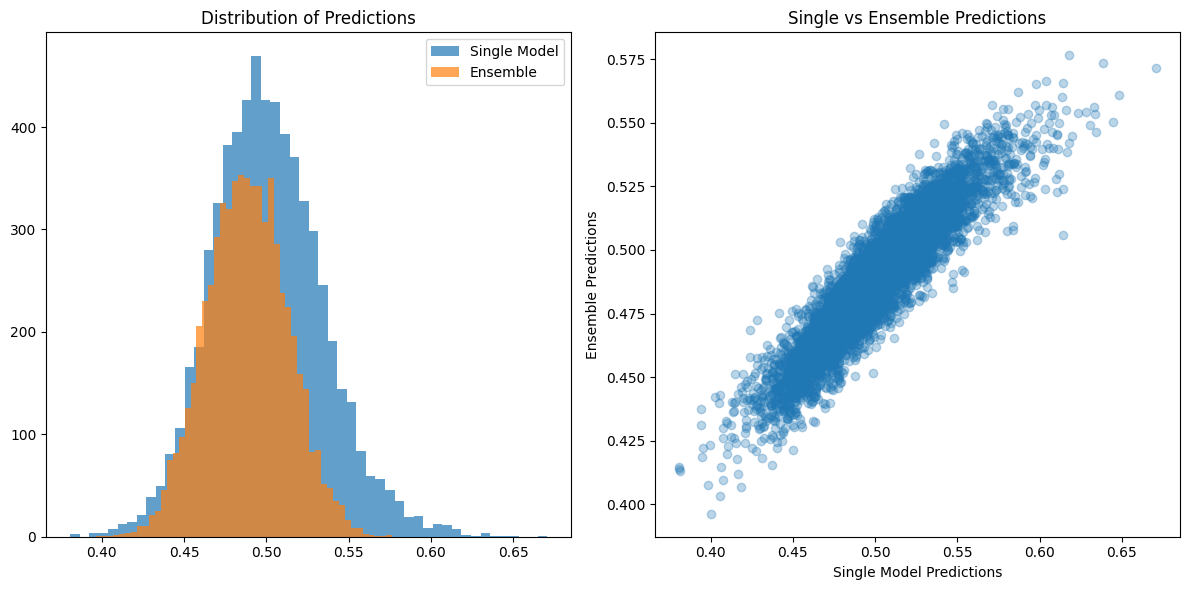

In [23]:
# %%
print("Generating ensemble predictions...")
# Generate predictions for each model in the ensemble and combine them
with torch.no_grad():
    ensemble_live_preds = generate_ensemble_predictions(ensemble_models, x_live_tensor)

# Create submission with ensemble predictions
ensemble_submission = pd.DataFrame(data={
    'id': live_ids,
    'prediction': ensemble_live_preds
})

# Save ensemble submission
ensemble_submission.to_csv('ensemble_submission.csv', index=False)
print(f"Ensemble submission file created with {len(ensemble_submission)} predictions")
print("First 5 ensemble predictions:", ensemble_live_preds[:5])
print(f"Ensemble validation scores: {ensemble_val_scores}")
print(f"Average ensemble validation score: {np.mean(ensemble_val_scores):.6f}")

# %%
# Compare single model vs ensemble performance
print("\nModel comparison:")
print(f"Single model validation correlation: {val_corr:.6f}")
print(f"Ensemble average validation correlation: {np.mean(ensemble_val_scores):.6f}")
print(f"Ensemble best validation correlation: {max(ensemble_val_scores):.6f}")

# Visualize distribution of predictions
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(live_preds, bins=50, alpha=0.7, label='Single Model')
plt.hist(ensemble_live_preds, bins=50, alpha=0.7, label='Ensemble')
plt.legend()
plt.title('Distribution of Predictions')

plt.subplot(1, 2, 2)
plt.scatter(live_preds, ensemble_live_preds, alpha=0.3)
plt.xlabel('Single Model Predictions')
plt.ylabel('Ensemble Predictions')
plt.title('Single vs Ensemble Predictions')
plt.tight_layout()
plt.savefig('prediction_comparison.png')
plt.show()

In [24]:
live_ids = [f"live_{i}" for i in range(len(live_data))]

# Generate predictions with single model
model.eval()
with torch.no_grad():
    live_preds = model(x_live_tensor).numpy().flatten()

# Create submission
live_ids = [f"live_{i}" for i in range(len(live_data))]
submission = pd.DataFrame(data={
    'id': live_ids,
    'prediction': live_preds
})

print(f"Final model validation correlation: {val_corr:.6f}")
submission.to_csv('improved_submission.csv', index=False)
print(f"Improved submission file created with {len(submission)} predictions")
print("First 5 predictions:", live_preds[:5])

Final model validation correlation: 0.039782
Improved submission file created with 6294 predictions
First 5 predictions: [0.5237228  0.46435142 0.44185114 0.52181864 0.47390473]
